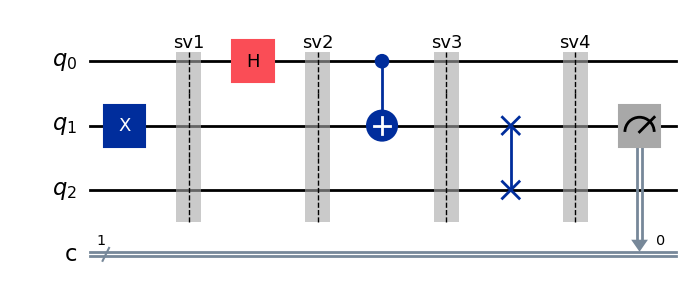

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

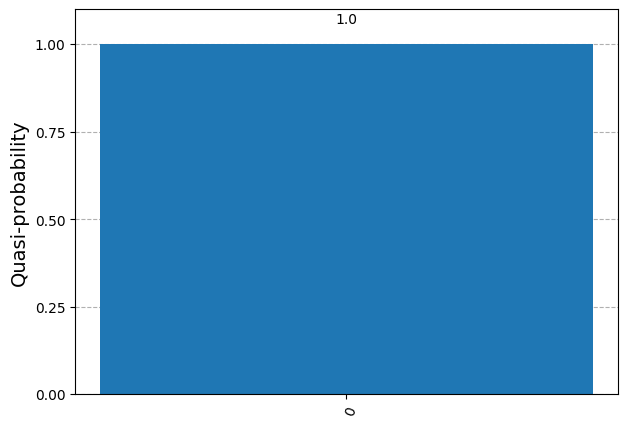

In [6]:
# quantum_circuit1.ipynb

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

# Cell 1
qc = QuantumCircuit(3, 1)

qc.x(1)
qc.save_statevector(label="sv1")
qc.h(0)
qc.save_statevector(label="sv2")
qc.cx(0, 1)
qc.save_statevector(label="sv3")
qc.swap(1, 2)
qc.save_statevector(label="sv4")
qc.measure(1, 0)

display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled).result()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.data(0)["sv4"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

counts = result.get_counts(qc)
display(plot_distribution(counts))

In [7]:
# Cell 2

# 1.) Explain the results shown in Statevector 4
"""
Statevector 1 shows that the state of the qubit in position 1 has flipped to a 1. This represents a value of 2.
Statevector 2 shows the effect of a Hadamard gate on qubit 0, which applies superposition and sends it into a 50/50 chance of being a 0 or a 1. This means that 50% of the time we will have a value of 2 and 50% of the time we will have a value of 3.
    To represent this in the statevector, the norm must be 1 so we normalize this by making the amplitudes 1/sqrt(2).
Statevector 3 shows the impact of the CNot gate applied with qubit 0 being the control and qubit 1 being the target.
    50% of the time, qubit 0 is on and a not gate is applied to qubit 1. This leads to a value of 1. The other half of the time, qubit 0 is off and qubit one stays on. This results in a value of 2.
    Again, we normalize this by making the amplitudes 1/sqrt(2) since the norm must be 1.
Statevector 4 shows the result of a swap gate between qubits 1 and 2. 50% of the time, qubit 0 is on. So, qubit 1 is 0 and the swap gate does nothing. This leads to a value of 1.
    The other 50% of the time, qubit 1 is off, so qubit one stays on. When swapped, this state of 1 goes to qubit 2, resulting in a value of 4.
    The amplitudes are then normalized.
"""


# 2.) Explain why is there a 100% chance of measuring only a value of 0 for the single classical bit?
"""
Nothing has been done to qubit 2. The last operation performed is a swap gate, so the state of qubit 2 (with its initial zero state) goes to qubit 1. When measured, qubit 1 will always have a value of 0.
"""

'\nNothing has been done to qubit 2. The last operation performed is a swap gate, so the state of qubit 2 (with its initial zero state) goes to qubit 1. When measured, this qubit will always have a value of 0.\n'